## Collect and Load Data

Data is from https://www.kaggle.com/datasets/calebreigada/us-air-quality-1980present 
<br>
Data contains 5M rows and 14 columns.

In [1]:
# The OS module in Python provides functions for interacting with the operating system
import os

# import the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

In [2]:
# get current working directory
cwd = os.getcwd()
print('Current working directory: ', cwd)

Current working directory:  C:\Users\KNguyen\Desktop\springboard\Capstone3_AQI\notebooks


In [3]:
# list directories
path = 'C:/Users/KNguyen/Desktop/springboard/Capstone3_AQI/data/raw'
dir_list = os.listdir(path)

print('Files and directories in ', path)
print(dir_list)

Files and directories in  C:/Users/KNguyen/Desktop/springboard/Capstone3_AQI/data/raw
['.gitkeep', 'us_aqi', 'us_aqi.zip']


In [4]:
# retrieve the raw data
raw_path = 'C:/Users/KNguyen/Desktop/springboard/Capstone3_AQI/data/raw/us_aqi/us_aqi.csv'
raw = pd.read_csv(raw_path, index_col=[0])

raw.head()

CBSA Code        Date  AQI Category Defining Parameter  \
0      10140  2022-01-01   21     Good              PM2.5   
1      10140  2022-01-02   12     Good              PM2.5   
2      10140  2022-01-03   18     Good              PM2.5   
3      10140  2022-01-04   19     Good              PM2.5   
4      10140  2022-01-05   17     Good              PM2.5   

   Number of Sites Reporting city_ascii state_id  state_name      lat  \
0                          2   Aberdeen       WA  Washington  46.9757   
1                          2   Aberdeen       WA  Washington  46.9757   
2                          2   Aberdeen       WA  Washington  46.9757   
3                          2   Aberdeen       WA  Washington  46.9757   
4                          2   Aberdeen       WA  Washington  46.9757   

        lng  population  density             timezone  
0 -123.8094     16571.0    588.0  America/Los_Angeles  
1 -123.8094     16571.0    588.0  America/Los_Angeles  
2 -123.8094     16571.0    588.0  America/Los_Angeles  
3 -123.8094     16571.0    588.0  America/Los_Angeles  
4 -123.8094     16571.0    588.0  America/Los_Angeles

In [5]:
raw.columns

Index(['CBSA Code', 'Date', 'AQI', 'Category', 'Defining Parameter',
       'Number of Sites Reporting', 'city_ascii', 'state_id', 'state_name',
       'lat', 'lng', 'population', 'density', 'timezone'],
      dtype='object')

In [6]:
len(raw)

5617325

In [7]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5617325 entries, 0 to 5718370
Data columns (total 14 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   CBSA Code                  int64  
 1   Date                       object 
 2   AQI                        int64  
 3   Category                   object 
 4   Defining Parameter         object 
 5   Number of Sites Reporting  int64  
 6   city_ascii                 object 
 7   state_id                   object 
 8   state_name                 object 
 9   lat                        float64
 10  lng                        float64
 11  population                 float64
 12  density                    float64
 13  timezone                   object 
dtypes: float64(4), int64(3), object(7)
memory usage: 642.9+ MB


### Fix dtypes

In [8]:
# change Date to datetime
raw['Date'] = pd.to_datetime(raw.Date)

# AQI to float
raw['AQI'] = raw['AQI'].astype(float)

raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5617325 entries, 0 to 5718370
Data columns (total 14 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   CBSA Code                  int64         
 1   Date                       datetime64[ns]
 2   AQI                        float64       
 3   Category                   object        
 4   Defining Parameter         object        
 5   Number of Sites Reporting  int64         
 6   city_ascii                 object        
 7   state_id                   object        
 8   state_name                 object        
 9   lat                        float64       
 10  lng                        float64       
 11  population                 float64       
 12  density                    float64       
 13  timezone                   object        
dtypes: datetime64[ns](1), float64(5), int64(2), object(6)
memory usage: 642.9+ MB


In [9]:
# check missing values
raw.isnull().sum()

CBSA Code                    0
Date                         0
AQI                          0
Category                     0
Defining Parameter           0
Number of Sites Reporting    0
city_ascii                   0
state_id                     0
state_name                   0
lat                          0
lng                          0
population                   0
density                      0
timezone                     0
dtype: int64

## Explore numeric and geospatial data

In [10]:
# .apply() part suppresses scientific notation
raw.describe().apply(lambda s: s.apply(lambda x: format(x, 'g'))).T

count     mean          std       min  \
CBSA Code                  5.61732e+06  30282.9      11427.2     10100   
AQI                        5.61732e+06  46.6557      35.7081         0   
Number of Sites Reporting  5.61732e+06  3.65027      5.09248         1   
lat                        5.61732e+06  38.4921      5.59537   17.9743   
lng                        5.61732e+06  -94.257      16.7866  -159.352   
population                 5.61732e+06   564229  1.53738e+06      1903   
density                    5.61732e+06  1083.64      1013.63         4   

                                25%       50%      75%        max  
CBSA Code                     20100     30340    40420      49740  
AQI                              30        41       54      20646  
Number of Sites Reporting         1         2        4         72  
lat                         34.9442   39.1886  42.1155    64.8353  
lng                        -106.964  -88.9342  -81.542    -66.061  
population                    28437    122549   391371  1.868e+07  
density                         525       834     1255      10768

AQI is categorized by the following:
<br>
0 - 50: Good
<br>
51 - 100: Moderate
<br>
101 - 150: Unhealthy for Sensitive Groups
<br>
151 - 200: Unhealthy
<br>
201 - 300: Very Unhealthy
<br>
301 - 500: Hazardous
<br>
501+ : "Beyond the AQI"; follow recommendations for the Hazardous category.
<br>

On average, the air quality is good.
<br>

But max AQI is 20646; we investigate the obversations that are beyond the AQI:

### Beyond AQI

In [11]:
beyond_aqi = raw[raw.AQI > 500]
beyond_aqi.sort_values(by='AQI', ascending=False)

CBSA Code       Date      AQI   Category Defining Parameter  \
3334599      13860 2001-05-02  20646.0  Hazardous               PM10   
3034632      13860 2003-02-02  16515.0  Hazardous               PM10   
1742171      13860 2011-12-01  13276.0  Hazardous               PM10   
3334516      13860 2001-02-08  12056.0  Hazardous               PM10   
3334515      13860 2001-02-07  10856.0  Hazardous               PM10   
...            ...        ...      ...        ...                ...   
809726       33540 2017-09-05    502.0  Hazardous              PM2.5   
245347       21660 2020-09-13    502.0  Hazardous              PM2.5   
2871062      11260 2004-04-27    501.0  Hazardous               PM10   
2025275      41620 2010-03-30    501.0  Hazardous               PM10   
3995942      48460 1997-04-18    501.0  Hazardous               PM10   

         Number of Sites Reporting      city_ascii state_id  state_name  \
3334599                          6          Bishop       CA  California   
3034632                          8          Bishop       CA  California   
1742171                         14          Bishop       CA  California   
3334516                          6          Bishop       CA  California   
3334515                          6          Bishop       CA  California   
...                            ...             ...      ...         ...   
809726                           3        Missoula       MT     Montana   
245347                           7          Eugene       OR      Oregon   
2871062                          4       Anchorage       AK      Alaska   
2025275                          5  Salt Lake City       UT        Utah   
3995942                          2     West Plains       MO    Missouri   

             lat       lng  population  density             timezone  
3334599  37.3665 -118.3958      3747.0    776.0  America/Los_Angeles  
3034632  37.3665 -118.3958      3747.0    776.0  America/Los_Angeles  
1742171  37.3665 -118.3958      3747.0    776.0  America/Los_Angeles  
3334516  37.3665 -118.3958      3747.0    776.0  America/Los_Angeles  
3334515  37.3665 -118.3958      3747.0    776.0  America/Los_Angeles  
...          ...       ...         ...      ...                  ...  
809726   46.8751 -114.0214     93723.0    839.0       America/Denver  
245347   44.0564 -123.1174    270013.0   1489.0  America/Los_Angeles  
2871062  61.1508 -149.1091    248902.0     66.0    America/Anchorage  
2025275  40.7776 -111.9311   1135747.0    700.0       America/Denver  
3995942  36.7377  -91.8680     12290.0    356.0      America/Chicago  

[409 rows x 14 columns]

Google search lead to an LA Times article from 2001 called '7 Wildfires Burn 80,000 Acres'. The article states that major fires were reported in Nevada, some which were burning partially in California, forcing evacuations. Bishop, CA borders Nevada. Perhaps these fires contributed to the abnormally high AQI values in Bishop, CA.

In [12]:
print(beyond_aqi.state_name.nunique(),' states with AQI > 500:')
print(beyond_aqi.state_name.unique())

14  states with AQI > 500:
['New Mexico' 'California' 'Oregon' 'Washington' 'Arizona' 'Wyoming'
 'Montana' 'Nevada' 'Texas' 'Utah' 'Alaska' 'Missouri' 'Illinois'
 'Pennsylvania']


In [13]:
raw.state_name.unique() #includes PR, Alaska, and Hawaii

array(['Washington', 'Ohio', 'Georgia', 'Oregon', 'New York',
       'New Mexico', 'Texas', 'Michigan', 'Wisconsin', 'Oklahoma',
       'Arkansas', 'Maine', 'California', 'Maryland', 'Louisiana',
       'Nebraska', 'Montana', 'North Dakota', 'Virginia', 'Illinois',
       'Indiana', 'Massachusetts', 'Colorado', 'Kentucky', 'Florida',
       'Utah', 'Iowa', 'West Virginia', 'South Carolina',
       'North Carolina', 'Tennessee', 'New Hampshire', 'Mississippi',
       'Missouri', 'Alabama', 'Minnesota', 'Arizona', 'Pennsylvania',
       'Wyoming', 'Puerto Rico', 'Hawaii', 'Idaho', 'Nevada',
       'Rhode Island', 'New Jersey', 'District of Columbia',
       'South Dakota', 'Alaska', 'Connecticut', 'Vermont', 'Kansas',
       'Delaware'], dtype=object)

In [14]:
# which regions have the dirtiest air?

#https://www.youtube.com/watch?v=Oht6cf-Acl0

#mainland = raw[(raw.state_name != 'Alaska') & (raw.state_name != 'Hawaii') & (raw.state_name != 'Puerto Rico')]
%matplotlib inline
fig = px.density_mapbox(beyond_aqi, lat='lat', lon='lng', z = 'AQI', radius = 10,\
                        mapbox_style = 'open-street-map', opacity = 0.9,\
                        zoom=3, range_color = [100, 3000],
                        hover_name='city_ascii', hover_data=['state_name', 'AQI', 'Defining Parameter', 'Date'],\
                        title = 'Places with AQI >500 from 1980-2022')
fig.show()


Most of the beyond the AQI ranges are in the West and Southwest, where it's generally drier and more prone to drought or wildfires. Exception is West Plains, MO.

### AQI Reporting Sites all over the US

In [15]:
# figure out a way to plot all the sites without crashing

### Compare numerical features vs AQI

In [16]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5617325 entries, 0 to 5718370
Data columns (total 14 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   CBSA Code                  int64         
 1   Date                       datetime64[ns]
 2   AQI                        float64       
 3   Category                   object        
 4   Defining Parameter         object        
 5   Number of Sites Reporting  int64         
 6   city_ascii                 object        
 7   state_id                   object        
 8   state_name                 object        
 9   lat                        float64       
 10  lng                        float64       
 11  population                 float64       
 12  density                    float64       
 13  timezone                   object        
dtypes: datetime64[ns](1), float64(5), int64(2), object(6)
memory usage: 642.9+ MB


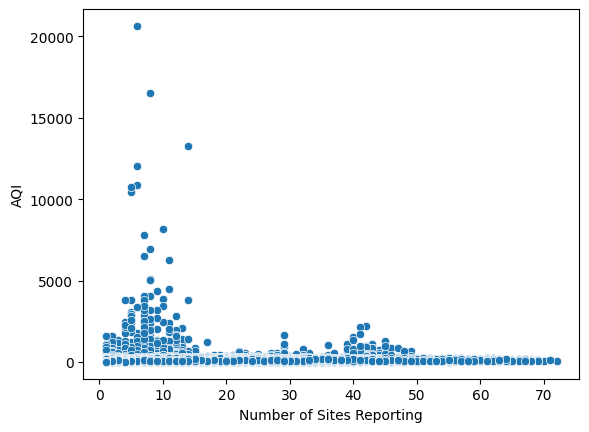

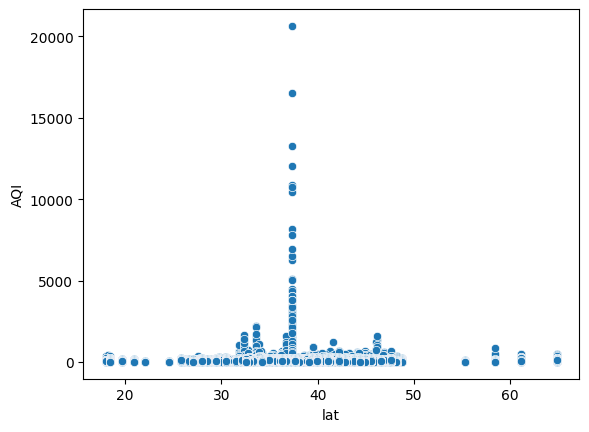

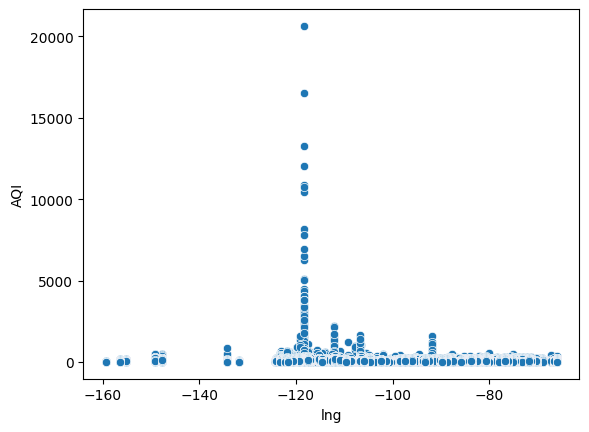

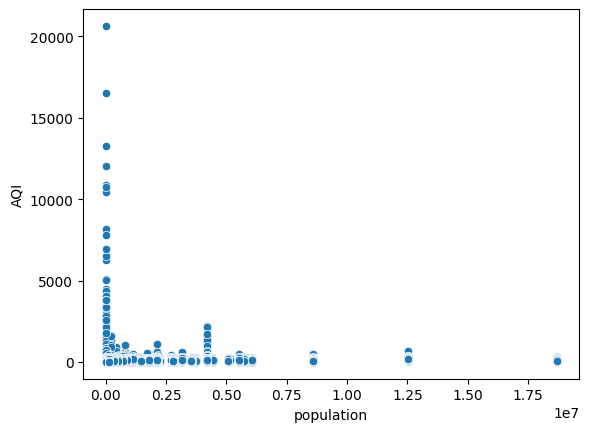

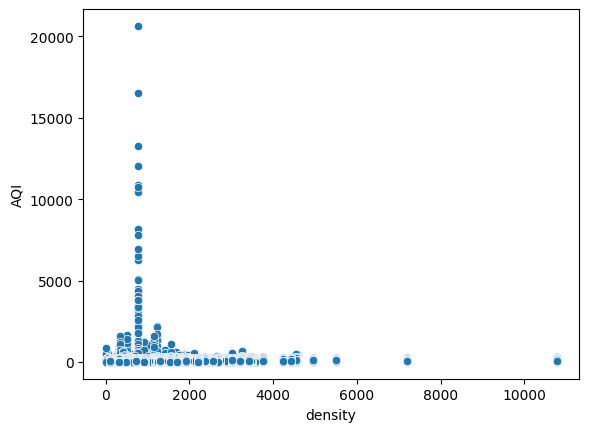

In [17]:
num_cols = ['Number of Sites Reporting', 'lat', 'lng', 'population', 'density']

for col in num_cols:
    sns.scatterplot(data=raw, x=col, y='AQI')
    plt.show()

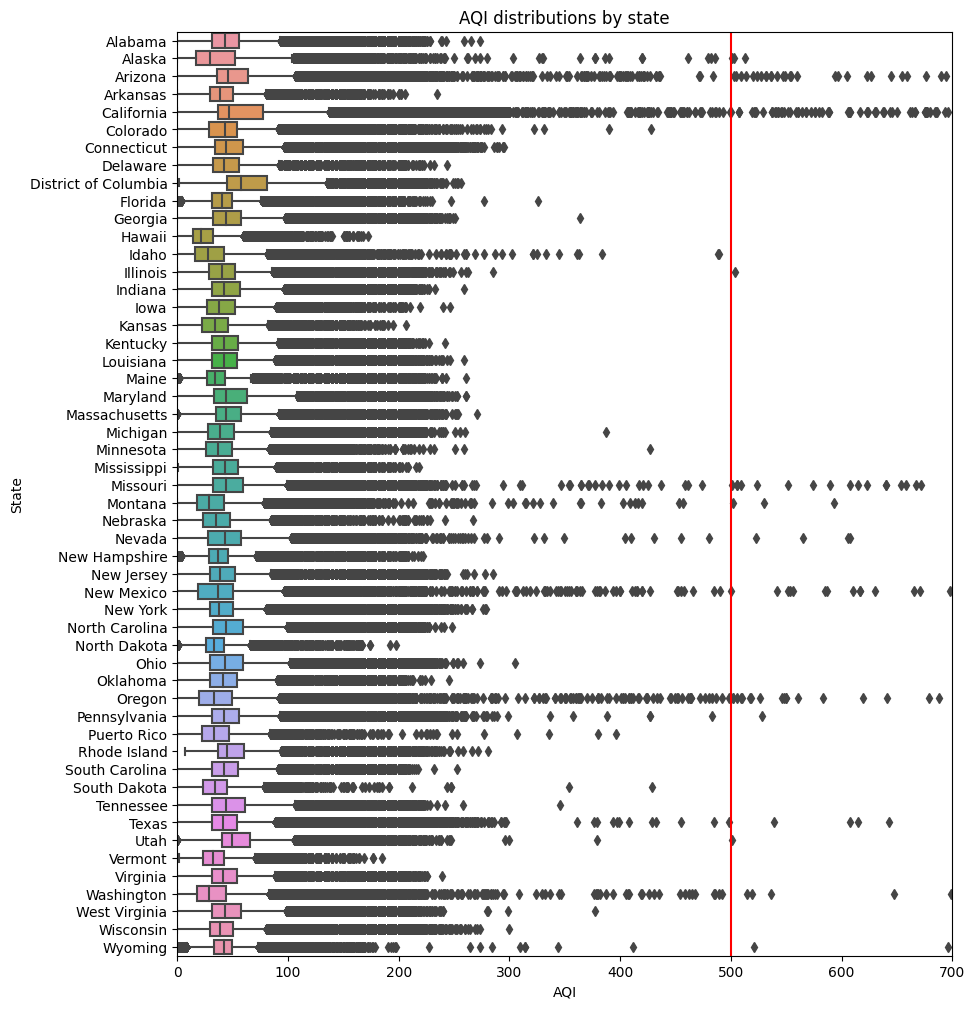

In [18]:
#boxplots

plt.subplots(figsize=(10, 12))
g = sns.boxplot(y='state_name', x='AQI', data=raw.sort_values(by='state_name'))
g.set_xlim([0, 700])
plt.xticks(rotation='horizontal')
plt.title('AQI distributions by state')
plt.xlabel('AQI')
plt.ylabel('State')
plt.axvline(x = 500, color = 'r');

Every state has high outliers.
<br>
Low outliers for Maine, North Dakota, MA, Florida, Utah, New Hampshire, Wyoming.

### Outlier detection

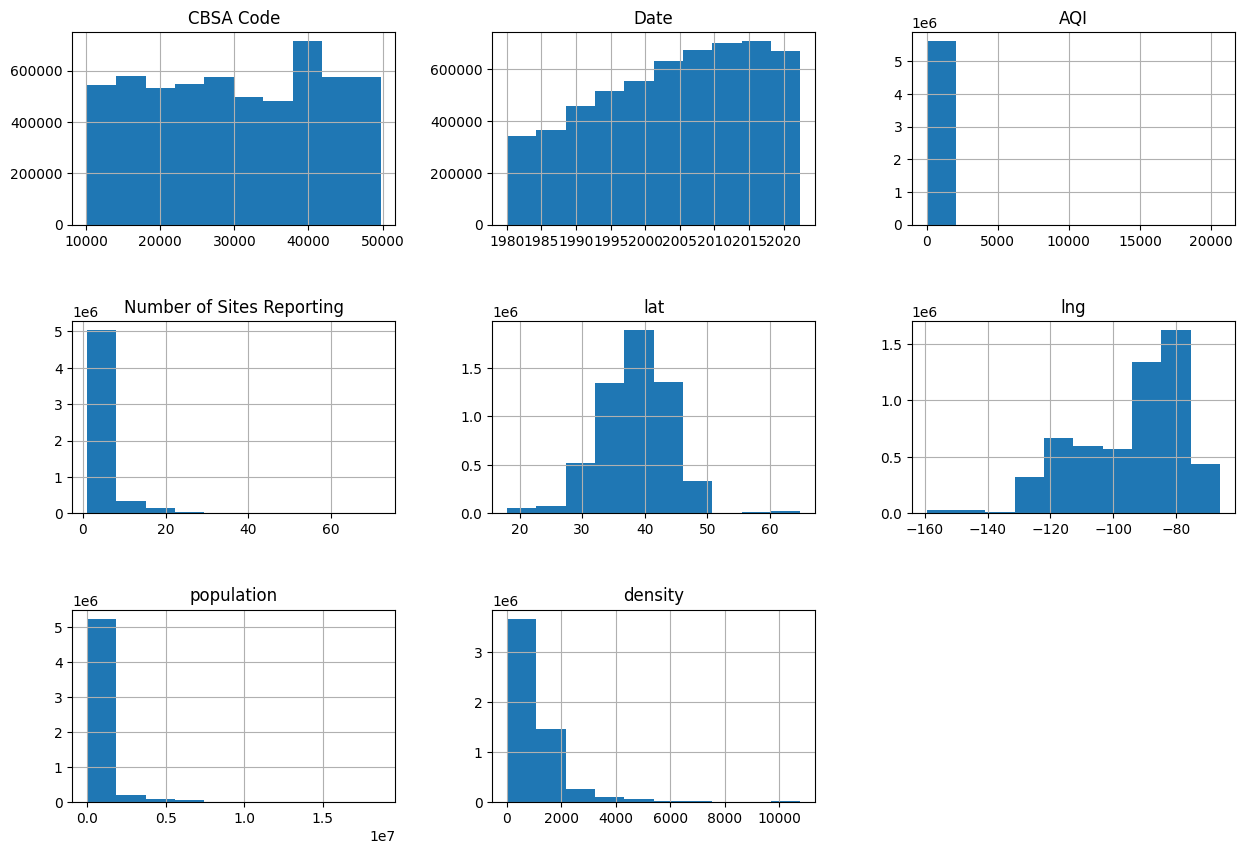

In [19]:
# histograms
raw.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

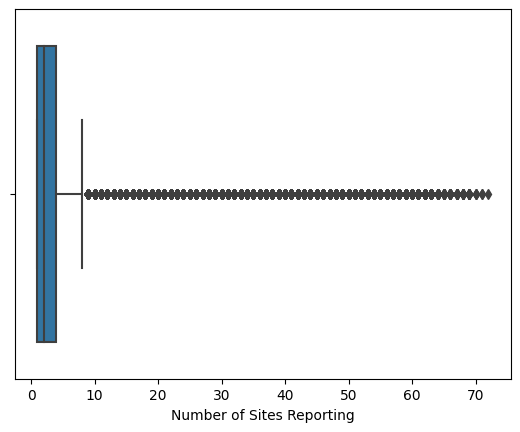

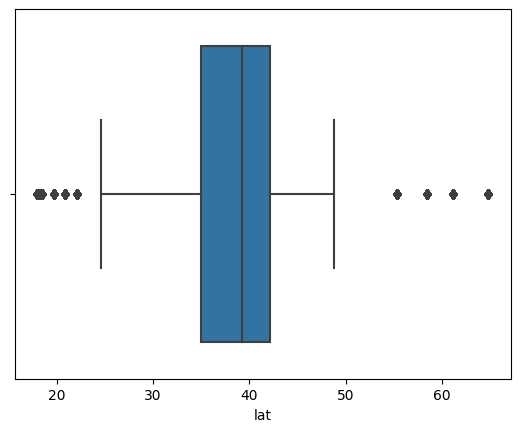

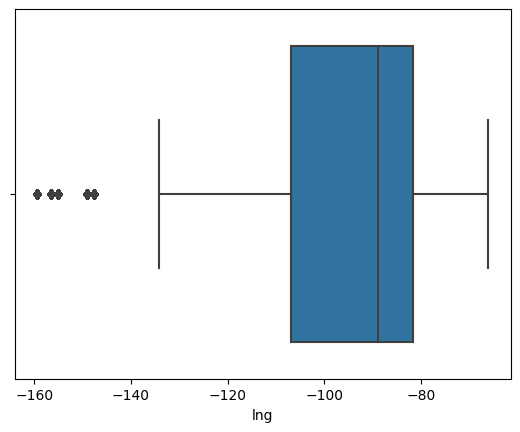

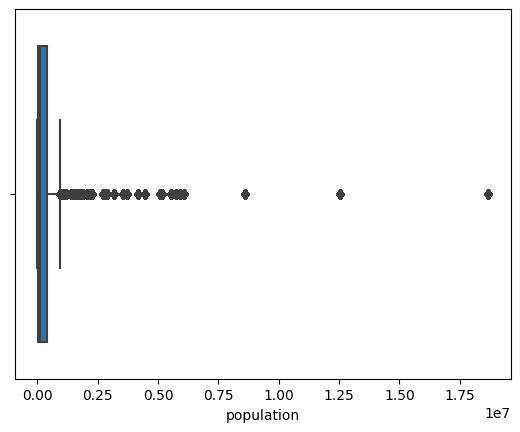

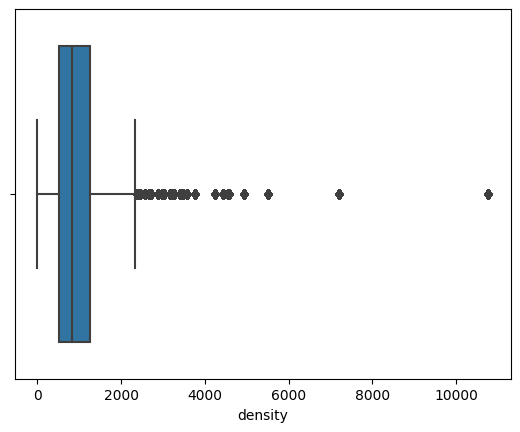

In [20]:
# compute outliers for AQI, Number of Sites Reporting, population, density
# lat, lng

num_cols = ['Number of Sites Reporting', 'lat', 'lng', 'population', 'density']

for col in num_cols:
    sns.boxplot(data=raw, x=col)
    plt.show()
    


*Outliers in dataset:*
<br>
Number of Sites Reporting >= 10 (max is about 72)
<br>
lat >= 50 and lat < 23 (min is about 17, max is about 65)
<br>
long < -137 (min is -160)
<br>
pop > 0.10 x 1e7 (max > 1.75 x 1e7)
<br>
density > 2500 (max > 10000)

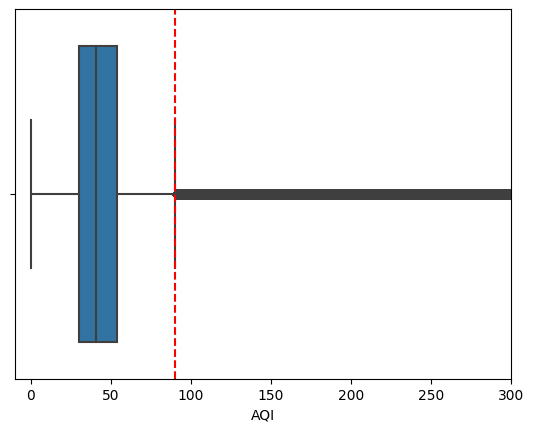

In [21]:
# boxplot for AQI

ax = sns.boxplot(data=raw, x='AQI')
ax.set_xlim(xmin = -10, xmax = 300)
plt.axvline(x=90, color='r', linestyle = 'dashed')

In [22]:
print('Median AQI is ', raw.AQI.median())

Median AQI is  41.0


Median AQI is 41 (good), and AQI > 90 (moderate) are outliers.

In [23]:
print(np.mean([raw.AQI > 90])*100, '% of the data have AQI > 90.')

7.10640740922058 % of the data have AQI > 90.


In [24]:
# max numbers of reporting sites
raw[raw['Number of Sites Reporting']>=70]

CBSA Code       Date    AQI                        Category  \
3767314      16980 1998-04-17   56.0                        Moderate   
3767344      16980 1998-05-17  108.0  Unhealthy for Sensitive Groups   
3767350      16980 1998-05-23   80.0                        Moderate   
3767356      16980 1998-05-29   87.0                        Moderate   
3767362      16980 1998-06-04   50.0                            Good   
3767368      16980 1998-06-10   97.0                        Moderate   

        Defining Parameter  Number of Sites Reporting city_ascii state_id  \
3767314                NO2                         70    Chicago       IL   
3767344              Ozone                         71    Chicago       IL   
3767350              Ozone                         72    Chicago       IL   
3767356                NO2                         70    Chicago       IL   
3767362                NO2                         70    Chicago       IL   
3767368              Ozone                         71    Chicago       IL   

        state_name      lat      lng  population  density         timezone  
3767314   Illinois  41.8375 -87.6866   8586888.0   4576.0  America/Chicago  
3767344   Illinois  41.8375 -87.6866   8586888.0   4576.0  America/Chicago  
3767350   Illinois  41.8375 -87.6866   8586888.0   4576.0  America/Chicago  
3767356   Illinois  41.8375 -87.6866   8586888.0   4576.0  America/Chicago  
3767362   Illinois  41.8375 -87.6866   8586888.0   4576.0  America/Chicago  
3767368   Illinois  41.8375 -87.6866   8586888.0   4576.0  America/Chicago

In [25]:
raw[raw['Number of Sites Reporting']>20].city_ascii.unique()

array(['Chicago', 'Dallas', 'Houston', 'New York', 'Gillette',
       'Los Angeles', 'Minneapolis', 'Philadelphia', 'Phoenix',
       'Riverside', 'Rock Springs', 'Sacramento', 'St. Louis',
       'Pittsburgh', 'Detroit', 'Washington', 'Indianapolis', 'Seattle',
       'Tucson', 'Knoxville', 'Denver', 'Miami', 'Atlanta', 'Cincinnati',
       'Cleveland', 'Tampa', 'Las Vegas', 'Boston', 'Milwaukee',
       'San Juan', 'Santa Maria', 'Charlotte', 'Baltimore'], dtype=object)

In [26]:
# cities with density > 5000
raw[raw['density']>=5000]['city_ascii'].unique()

array(['Boston', 'New York', 'San Francisco'], dtype=object)

In [27]:
# cities with population over 1M
raw[raw['population']>=1000000]['city_ascii'].unique()

array(['Atlanta', 'Austin', 'Baltimore', 'Boston', 'Charlotte', 'Chicago',
       'Cincinnati', 'Cleveland', 'Columbus', 'Dallas', 'Denver',
       'Houston', 'Indianapolis', 'Jacksonville', 'Kansas City',
       'Las Vegas', 'Memphis', 'Milwaukee', 'Nashville', 'New York',
       'Orlando', 'Philadelphia', 'Phoenix', 'Pittsburgh', 'Portland',
       'Providence', 'Raleigh', 'Richmond', 'Riverside', 'Sacramento',
       'Salt Lake City', 'San Antonio', 'San Diego', 'San Francisco',
       'San Jose', 'San Juan', 'Seattle', 'St. Louis', 'Tampa',
       'Virginia Beach', 'Washington', 'Detroit', 'Los Angeles', 'Miami',
       'Minneapolis'], dtype=object)

In [28]:
print('mean AQI: ',raw.AQI.mean())
print('median AQI: ',raw.AQI.median())

mean AQI:  46.65572332026365
median AQI:  41.0


## Explore Categorical Data

In [29]:
raw.columns

Index(['CBSA Code', 'Date', 'AQI', 'Category', 'Defining Parameter',
       'Number of Sites Reporting', 'city_ascii', 'state_id', 'state_name',
       'lat', 'lng', 'population', 'density', 'timezone'],
      dtype='object')

In [30]:
cat_cols = ['Category', 'Defining Parameter', 'city_ascii', 'state_id', 'state_name', 'timezone']

for col in cat_cols:
    print(col, ': ' ,raw[col].nunique())

Category :  6
Defining Parameter :  5
city_ascii :  614
state_id :  52
state_name :  52
timezone :  17


In [31]:
raw.Category.unique()

array(['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy',
       'Hazardous', 'Very Unhealthy'], dtype=object)

In [32]:
raw['Defining Parameter'].unique()

array(['PM2.5', 'Ozone', 'NO2', 'PM10', 'CO'], dtype=object)

In [33]:
raw.timezone.unique()

array(['America/Los_Angeles', 'America/New_York', 'America/Denver',
       'America/Chicago', 'America/Detroit',
       'America/Indiana/Indianapolis', 'America/Matamoros',
       'America/Phoenix', 'America/Puerto_Rico', 'Pacific/Honolulu',
       'America/Boise', 'America/Indiana/Vincennes', 'America/Anchorage',
       'America/Juneau', 'America/Menominee', 'America/Toronto',
       'America/Sitka'], dtype=object)

Data has 17 timezones, but according to https://www.worldatlas.com/articles/how-many-time-zones-are-in-the-united-states.html, the US (excluding Puerto Rico) has only 6: Hawaii-Aleutian, Alaska, Pacific, Mountain, Central, and Eastern. Puerto Rico has its own timezone.
<br>
We map the timezones to the following 7 above so there will be less categories to deal with.

### Fix the timezones

In [34]:
tz = {
    
    'America/Los_Angeles': 'Pacific',
    'America/New_York': 'Eastern', 
    'America/Denver': 'Mountain', 
    'America/Chicago': 'Central', 
    'America/Detroit': 'Eastern',
    'America/Indiana/Indianapolis': 'Eastern', 
    'America/Matamoros': 'Central',
    'America/Phoenix': 'Mountain', 
    'America/Puerto_Rico': 'Puerto Rico', 
    'Pacific/Honolulu': 'Hawaii-Aleutian',
    'America/Boise': 'Mountain', 
    'America/Indiana/Vincennes': 'Eastern', 
    'America/Anchorage': 'Alaska',
    'America/Juneau': 'Alaska', 
    'America/Menominee': 'Eastern', 
    'America/Toronto': 'Eastern',
    'America/Sitka': 'Alaska'
}

In [35]:
raw['tz'] = raw['timezone'].map(tz)

raw[['timezone', 'tz', 'state_id']].sample(10)

timezone       tz state_id
4995054      America/Chicago  Central       WI
4826451     America/New_York  Eastern       OH
2653511     America/New_York  Eastern       FL
2275705      America/Chicago  Central       IN
4237825      America/Chicago  Central       OK
4134506     America/New_York  Eastern       NH
3142553  America/Los_Angeles  Pacific       CA
2462328     America/New_York  Eastern       PA
1700582  America/Los_Angeles  Pacific       CA
1134078  America/Los_Angeles  Pacific       OR

In [36]:
# drop the timezone column

raw.drop(columns=['timezone'], inplace=True)


### Defining Parameter

<IPython.core.display.Javascript object>


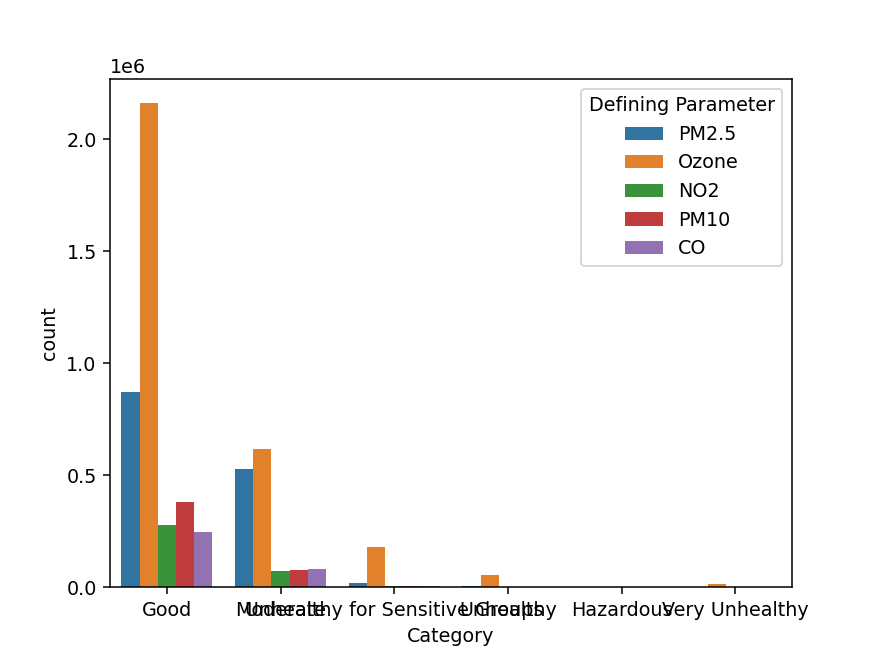

In [75]:
# Defining parameter...
%matplotlib notebook
sns.countplot(data=raw, x='Category', hue='Defining Parameter')
plt.show()

In [77]:
raw['Category'].unique()

array(['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy',
       'Hazardous', 'Very Unhealthy'], dtype=object)

### Pair and catplots

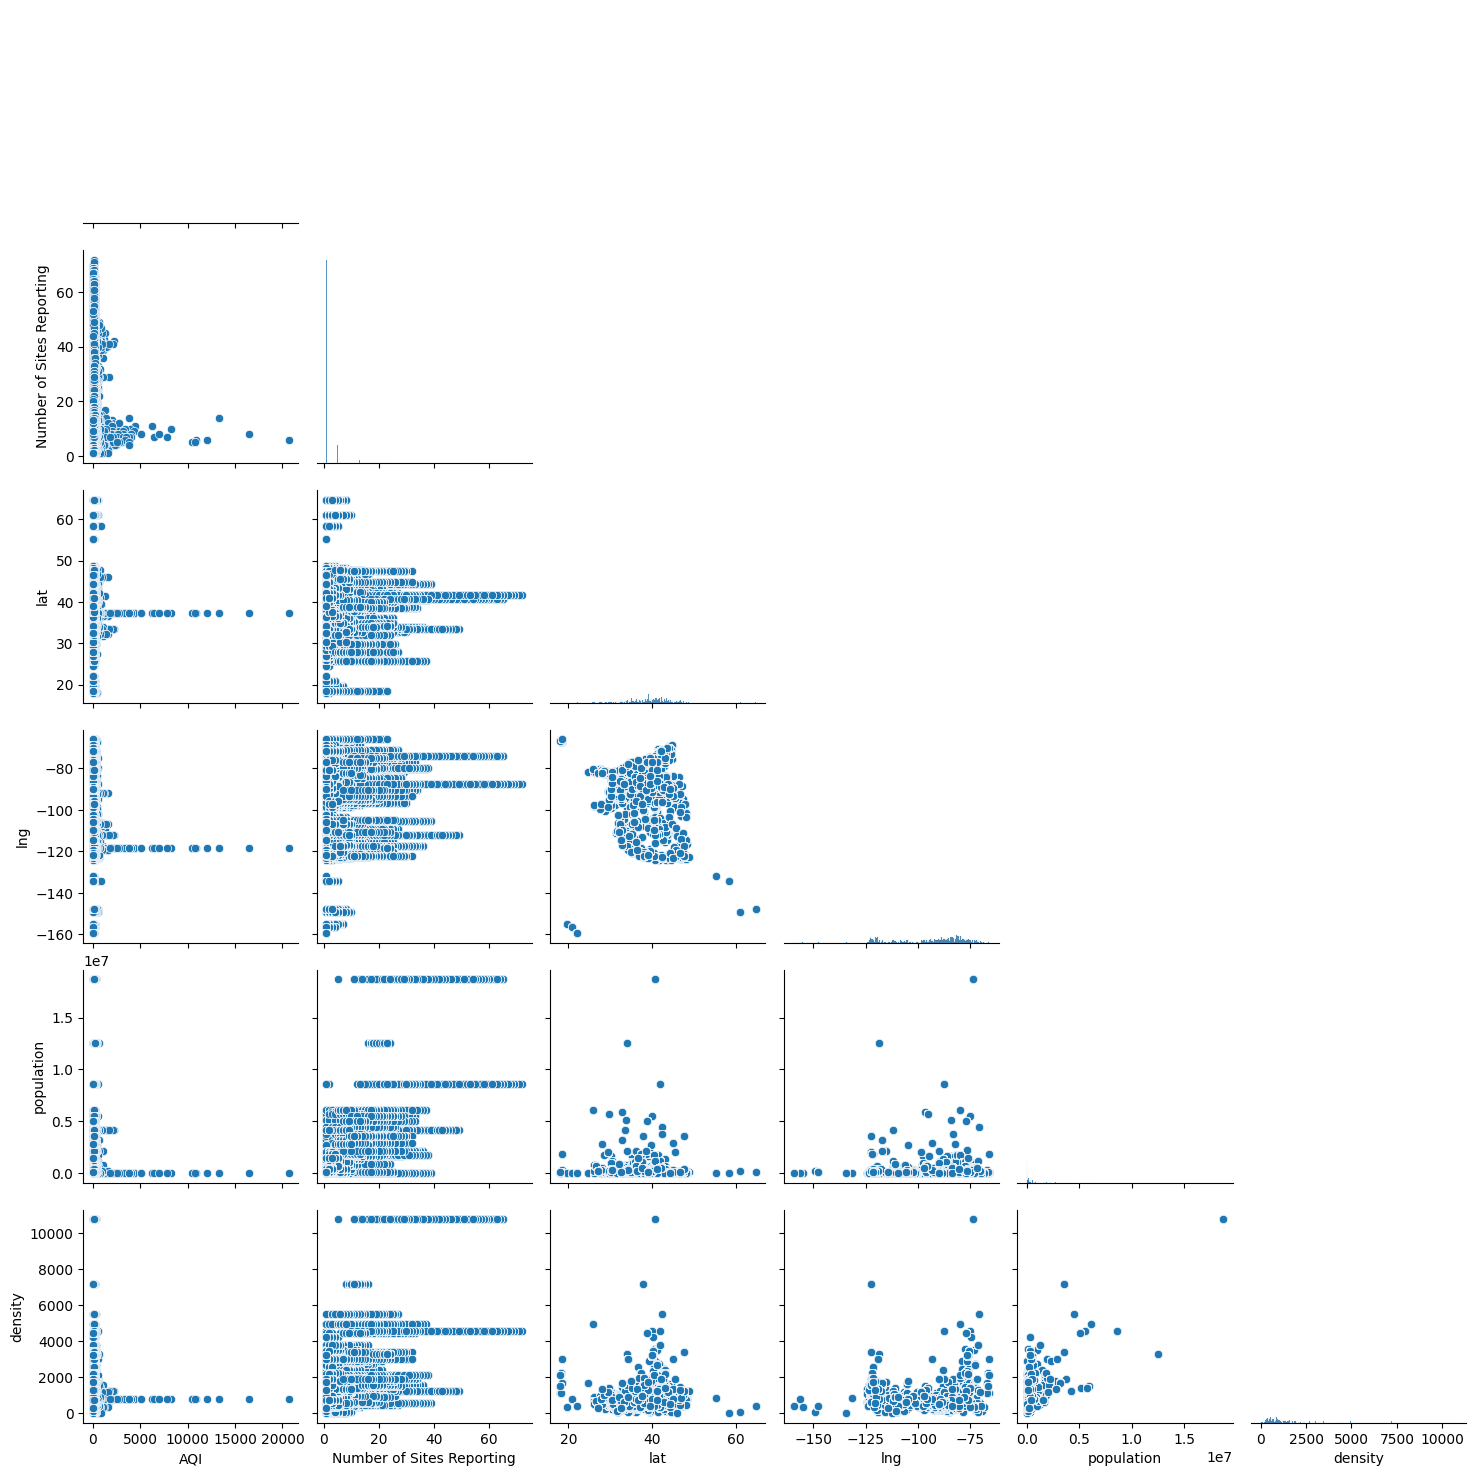

In [37]:
# use scatterplots/pairplots to find correlated numerical features

#num_cols_w_aqi = num_cols = ['AQI', 'Number of Sites Reporting', 'lat', 'lng', 'population', 'density']

sns.pairplot(data=raw.drop(columns=['CBSA Code']), corner=True)


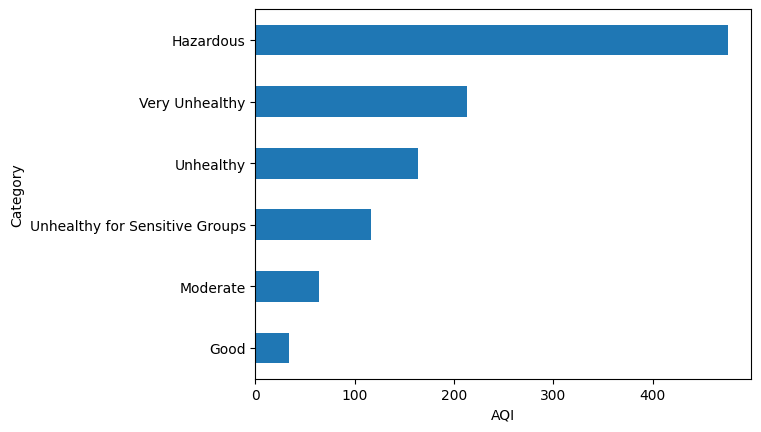

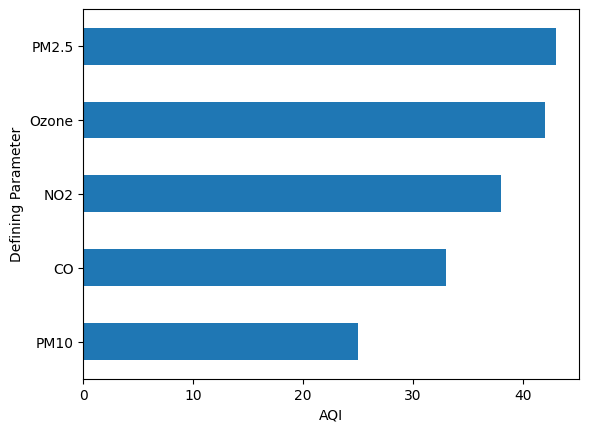

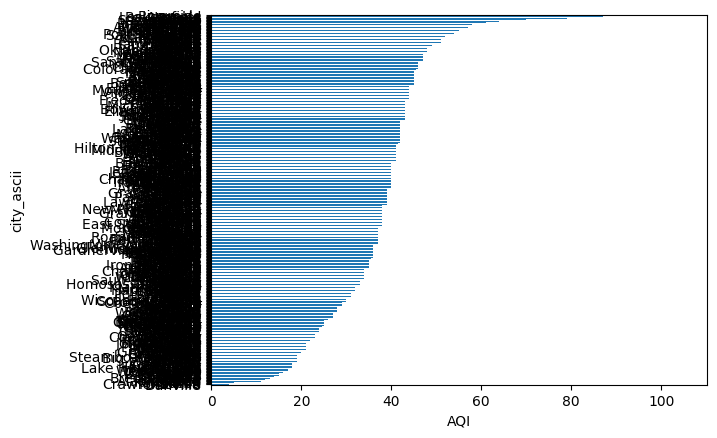

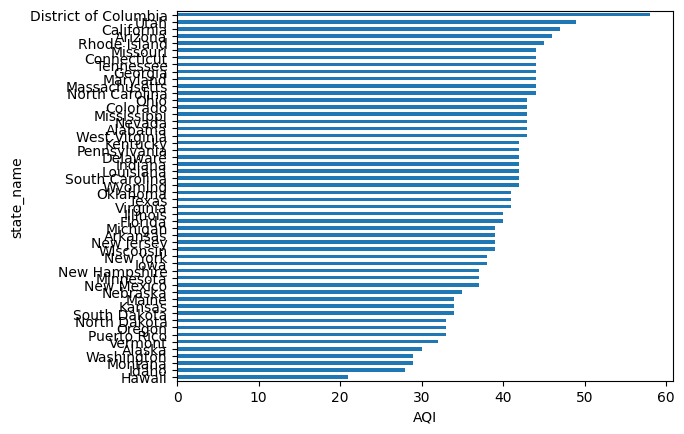

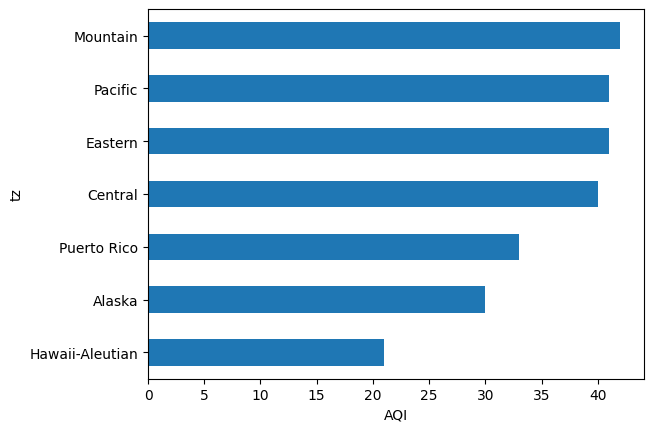

In [38]:
# cat_cols vs AQI

cat_cols = ['Category', 'Defining Parameter', 'city_ascii', 'state_name', 'tz']
for col in cat_cols:
    #plt.figure(figsize=(10,15))
    raw.groupby(col)['AQI'].median().sort_values(ascending=True).plot.barh()
    plt.ylabel(col)
    plt.xlabel('AQI')
    plt.show()

Mainland USA (Pacific, Mountain, Central, Eastern timezones) have higher median AQI than Alaska, Hawaii, and Puerto Rico.

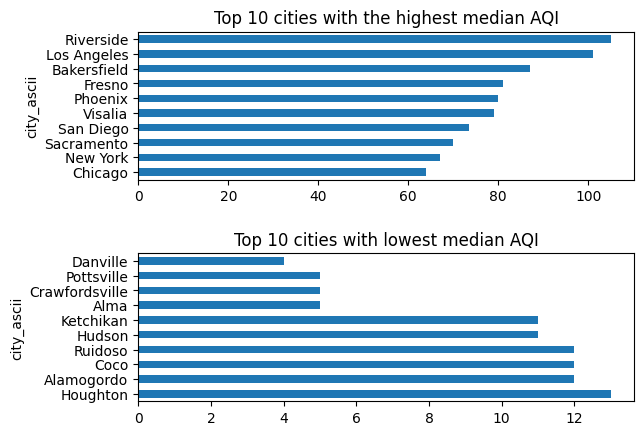

In [39]:
# take closer look at states and cities.
fig, ax = plt.subplots(2,1)
raw.groupby(['city_ascii'])['AQI'].median().nlargest(10).sort_values(ascending=True).plot.barh(ax=ax[0])
ax[0].set_title('Top 10 cities with the highest median AQI')

raw.groupby(['city_ascii'])['AQI'].median().nsmallest(10).sort_values(ascending=False).plot.barh(ax=ax[1])
ax[1].set_title('Top 10 cities with lowest median AQI')

fig.subplots_adjust(hspace=0.5)

In [40]:
# most of the top 10 cities with HIGH AQI are from CA.
# what about the ones with LOW AQI?
low_cities = ['Danville', 'Pottsville', 'Crawfordsville', 'Alma', 'Ketchikan', \
              'Hudson', 'Ruidoso', 'Coco', 'Alamogordo', 'Houghton']

for city in low_cities:
    print(city + ', ' + raw[raw.city_ascii == city].state_name.unique())

['Danville, Virginia' 'Danville, Kentucky']
['Pottsville, Pennsylvania']
['Crawfordsville, Indiana']
['Alma, Michigan']
['Ketchikan, Alaska']
['Hudson, New York']
['Ruidoso, New Mexico']
['Coco, Puerto Rico']
['Alamogordo, New Mexico']
['Houghton, Michigan']


Text(0.5, 1.0, 'Median AQI for each state')

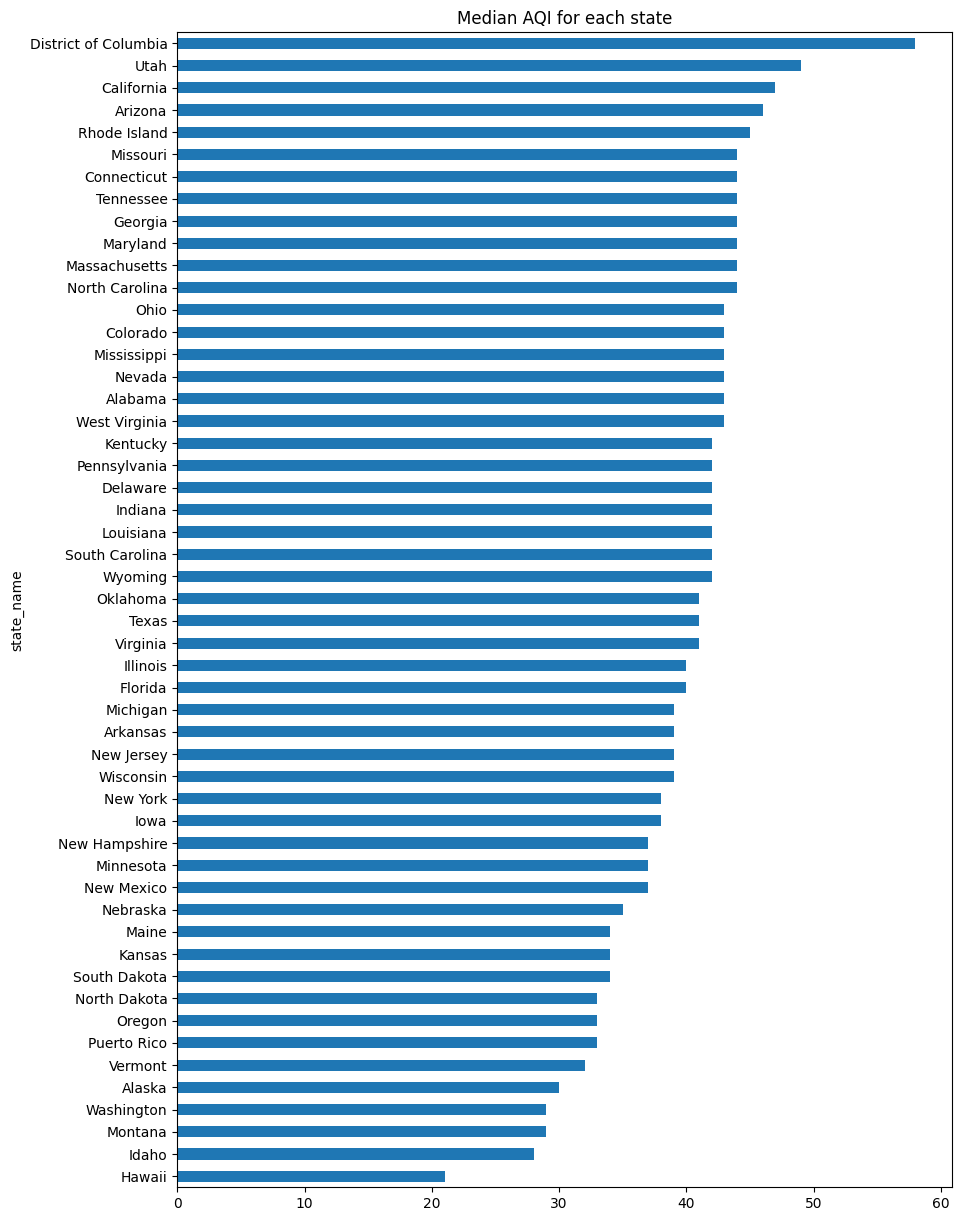

In [41]:
# closer look at state
plt.figure(figsize=(10,15))
raw.groupby(['state_name'])['AQI'].median().sort_values(ascending=True).plot.barh()
plt.title('Median AQI for each state')

In [42]:
raw.columns

Index(['CBSA Code', 'Date', 'AQI', 'Category', 'Defining Parameter',
       'Number of Sites Reporting', 'city_ascii', 'state_id', 'state_name',
       'lat', 'lng', 'population', 'density', 'tz'],
      dtype='object')

<AxesSubplot: >

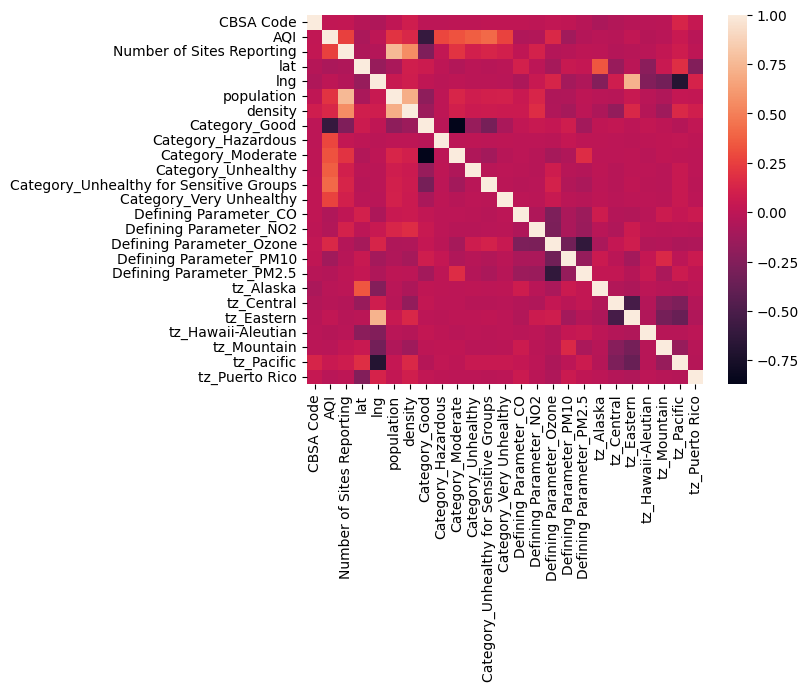

In [43]:
# heatmap

# OHE on categorical variables
# drop state and cities, b/c high cardinality
# tz will represent the region
df_ohe = pd.get_dummies(raw.drop(columns=['city_ascii', 'state_id', 'state_name']))
sns.heatmap(df_ohe.corr())

## Filtering outliers (just in case we need it)

In [44]:
#https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/introduction-to-time-series-in-pandas-python/
# EDA involving datetime

#sns.lineplot(data=raw, x='Date', y='AQI')
#plt.title('AQI levels over time')

In [45]:
# graph without outliers for AQI
#machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/

q25, q75 = np.percentile(raw.AQI, 25), np.percentile(raw.AQI, 75)
iqr = q75-q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))

cut_off = iqr * 1.5
lower, upper = q25-cut_off, q75+cut_off

outliers = [x for x in raw.AQI if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

outliers_removed = [x for x in raw.AQI if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Percentiles: 25th=30.000, 75th=54.000, IQR=24.000
Identified outliers: 399190
Non-outlier observations: 5218135


In [46]:
raw_no_outliers = raw[raw.AQI.isin(outliers_removed)]
print(len(raw_no_outliers))

5218135


## EDA with time series

In [47]:
print('earliest date: ', raw.Date.min())
print('latest date: ', raw.Date.max())
print('Time btwn earliest and latest date: ', raw.Date.max()-raw.Date.min())

earliest date:  1980-01-01 00:00:00
latest date:  2022-05-31 00:00:00
Time btwn earliest and latest date:  15491 days 00:00:00


In [48]:
#https://www.youtube.com/watch?v=UFuo7EHI8zc&list=PL-osiE80TeTsWmV9i9c58mdDCSskIFdDS&index=10

# set index to date
raw_dt = raw.set_index('Date')

# daily median AQI
medians = raw_dt.AQI.resample('D').median()
medians.head(14)

# daily highs
highs = raw_dt.AQI.resample('D').max()

# daily lows
lows = raw_dt.AQI.resample('D').min()

In [49]:
len(medians)

15492

<IPython.core.display.Javascript object>


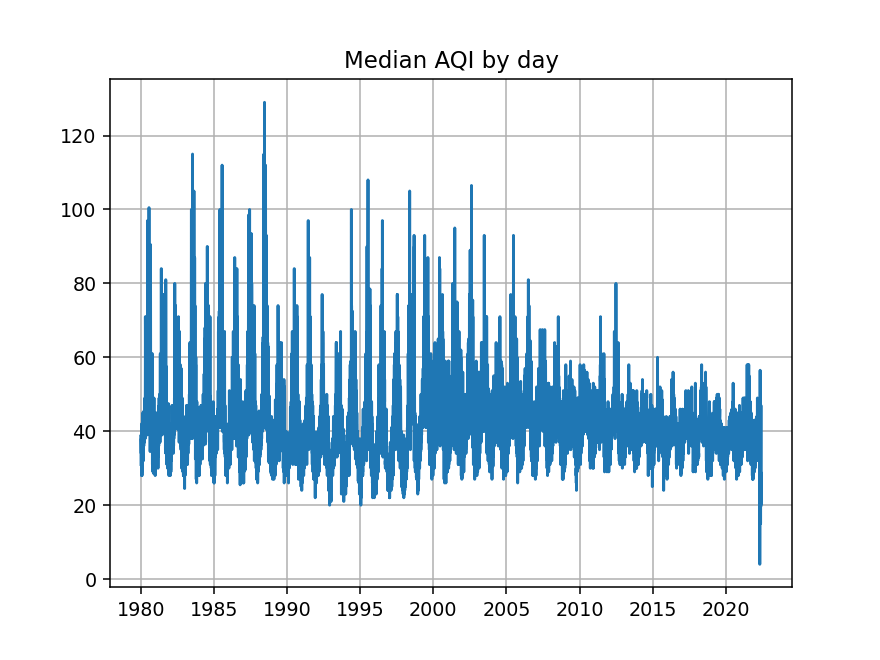

In [56]:
%matplotlib notebook
plt.plot(medians)
plt.title('Median AQI by day')
plt.grid()


<IPython.core.display.Javascript object>


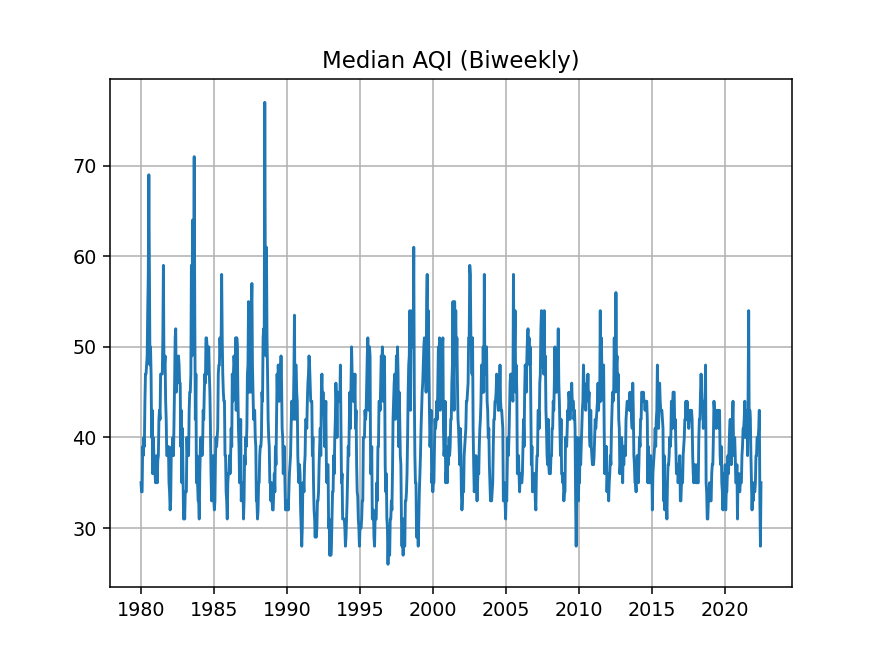

In [57]:
# biweekly median AQI
medians_2w = raw_dt.AQI.resample('2W').median()

%matplotlib notebook
plt.plot(medians_2w)
plt.title('Median AQI (Biweekly)')
plt.grid()

<IPython.core.display.Javascript object>


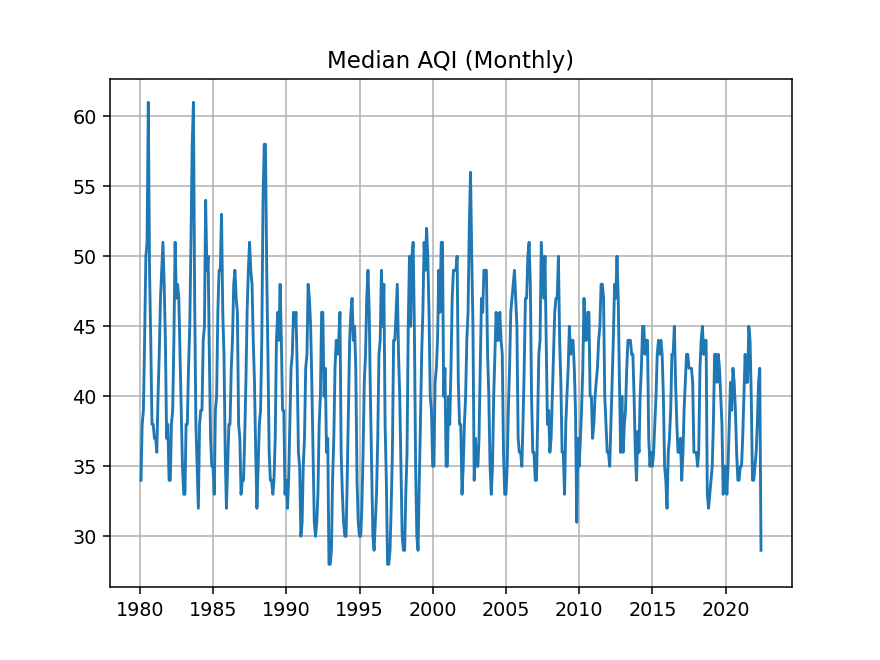

In [58]:
# monthly median AQI
medians_mo = raw_dt.AQI.resample('M').median()

%matplotlib notebook
plt.plot(medians_mo)
plt.title('Median AQI (Monthly)')
plt.grid()

<IPython.core.display.Javascript object>


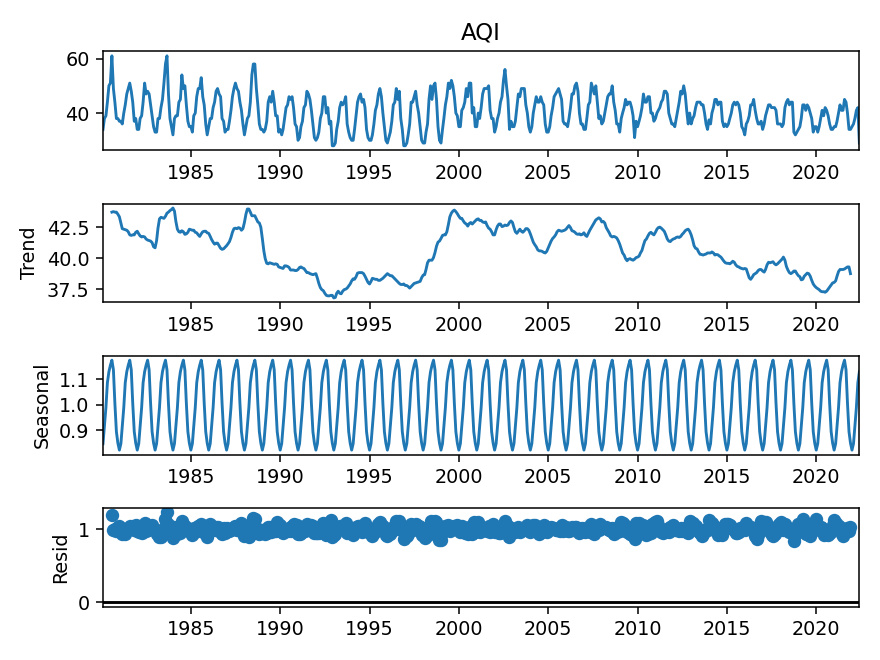

In [81]:
# decompose -- multiplicative(?)
# for monthly median AQI

from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(medians_mo, model='multiplicative')
decomp.plot()
plt.show()

In [80]:
# save file

raw_dt.to_csv('AQI_wrangled.csv')